# 언더 샘플링과 오버 샘플링의 이해
레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능의 문제가 발생할 수 있다.
- 이상 레이블을 가지는 데이터 건수는 매우 적기 때문에 제대로 다양한 유형을 학습하지 못하는 반면
- 정상 레이블의 데이터가 매우 많기 때문에 일방적인 학습을 수행해 제대로 된 이상 데이터 검출이 어려움

<br>

![image](https://user-images.githubusercontent.com/70187490/131954767-06a0de3d-54f3-40ae-ab19-d66ef5222e7a.png)

극도로 불균형한 레이블 값 분포를 해결하는 방안으로 **오버샘플링(Oversampling)**과 **언더샘플링(Undersampling)**방법이 있다.  
- 언더샘플링은 많은 데이터 세트를 적은 데이터 수준으로 감소시키는 방법
    - 정상 레이블을 가진 데이터가 10,000건, 이상 레이블을 가진 데이터 100건이 있으면 정상 레이블을 100건으로 줄이는 방식
    - 이 방식은 과도하게 정상 레이블을 학습하는 것을 방지할 수 있지만
    - 너무 많은 정상 레이블 데이터를 감소시켜 정상 레이블을 도리어 제대로 된 학습을 수행할 수 없다는 단점이 있다.
    - 이 방식은 잘 적용하지 않는다.
- 오버샘플링은 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법
    - 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식시키는 방식
    - 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있음
    - SMOTE는 적은 데이터 세트에 있는 개별 데이터들을 K 최근접 이웃을 찾는다.
    - 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성함

![image](https://user-images.githubusercontent.com/70187490/131955203-5fa281cb-6607-4e77-89a3-4bdff42c811c.png)

# 데이터의 이해
신용카드 사기 검출 분류 데이터는 해당 데이터 세트의 레이블인 Class 속성이 매우 불균형한 분포를 가지고 있음
- Class는 0과 1로 분류된다.
- 0이 정상적인 신용카드 트랜잭션 데이터
- 1이 비정상적인 신용카드 트랜잭션, 즉 사기 데이터
- 전체 데이터의 약 0.172%만이 레이블 값이 1임  

각 컬럼의 정보는 다음과 같다
- V1 ~ V28: 개인정보로 공개되지 않은 값
- Time: 시간
- Amount: 거래 금액
- Class: 사기 여부 (1: 사기, 0: 정상)
- 총 31개의 Column으로 구성되어 있음

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

card_df = pd.read_csv('D:/Python/kaggle/credit_card/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


아무런 전처리를 하지 않았을 때의 여러 모델의 지표들

Time 피처의 경우 데이터 생성 관련한 작업용 속성으로 큰 의미가 없기에 제거  

In [2]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    
    return df_copy

get_train_test_dataset( )는 내부에서 학습과 테스트셋을 나누고 테스트 세트를 전체 30%인 Stratified 방식으로 추출해 학습 데이터 세트와 테스트 데이터 세트의 레이블 값 분포도를 서로 동일하게 만듬

In [3]:
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame을 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [4]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0]*100, '\n')
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64 

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

학습 데이터 레이블의 경우 1값이 0.172%, 테스트 데이터 레이블의 경우 1값이 약 0.173%로 큰 차이가 없이 분할
- 로지스틱회귀와 LightGBM 를 이용해 예측

In [6]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081, F1: 0.7200, AUC: 0.9627


In [8]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


# 이상치 제거 후 SMOTE 모델 적용
- 사분위수를 기준으로 이상치를 제거
- 이상치를 IQR을 기준으로 제거할 때 어떤 피처의 이상치 데이터를 검출할 것인지가 중요
- 매우 많은 피처가 있을 경우 이들 중 결정값(레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋음
- 모든 피처들의 이상치를 검출하는 것은 시간이 많이 소모되며
- 결정값과 상관성이 높지 않은 피처들의 경우는 이상치를 제거하더라도 크게 성능향상에 기여하지 않기 때문

<AxesSubplot:>

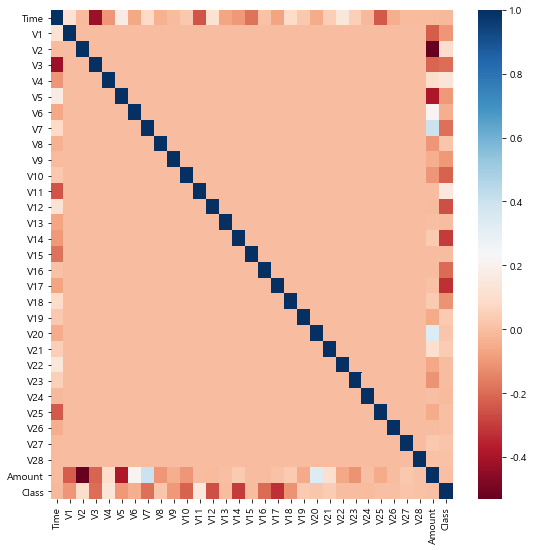

In [9]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

V14와 V17에 가장 높은 음의 상관관계가 존재

In [10]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 columns 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함
    fraud =df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1,5를 곱해 최댓값과 최솟값 지점을 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [11]:
outlier_index = get_outlier(df=card_df, column='V14')
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


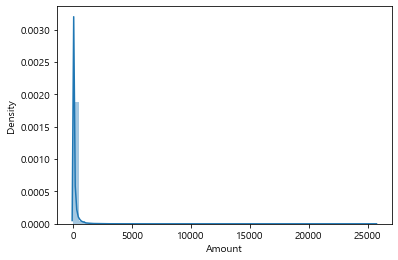

In [12]:
sns.distplot(card_df['Amount']);

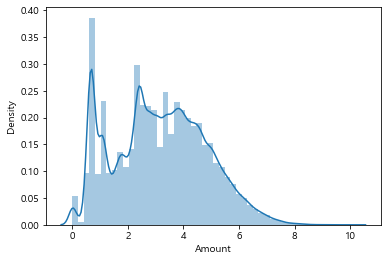

In [13]:
sns.distplot(np.log1p(card_df['Amount']));

In [14]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scale', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [15]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression()
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
print('### LightGBM 회귀 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
### LightGBM 회귀 예측 성능 ###
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780


# SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- SMOTE는 imbalanced-learn패키지의 SMOTE 클래스를 이용함
- SMOTE를 적용할 때는 반디스 학습 데이터 세트만 오버 샘플링해야 함
- 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우 결국 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증/테스트가 될 수 없음

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (199362,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


SMOTE로 증식된 데이터들을 활용하여 모델 학습 / 예측

In [17]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC: 0.9737


In [18]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC: 0.9814


In [19]:
new_data0 = pd.concat([X_train_over, X_test], axis=0)
new_data1 = pd.concat([y_train_over, y_test], axis=0)
new_data = pd.concat([new_data0, new_data1], axis=1)

In [24]:
from pycaret.classification import *
exp1 = setup(card_df, target='Class')

,Description,Value
0,session_id,6346
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
exp1 = setup(new_data, target='Class')

,Description,Value
0,session_id,2766
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(483481, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
top5 = compare_models(sort='f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9860,0.7957,0.9459,0.8633,0.8631,0.8668,15.0700
et,Extra Trees Classifier,0.9995,0.9486,0.7607,0.9534,0.8450,0.8447,0.8507,8.9760
rf,Random Forest Classifier,0.9995,0.9472,0.7578,0.9438,0.8395,0.8393,0.8449,26.8660
lda,Linear Discriminant Analysis,0.9994,0.8992,0.7694,0.8678,0.8147,0.8144,0.8163,0.7450
ada,Ada Boost Classifier,0.9992,0.9772,0.6876,0.8068,0.7394,0.7390,0.7429,8.4640
dt,Decision Tree Classifier,0.9991,0.8627,0.7258,0.7538,0.7372,0.7368,0.7381,2.6250
lr,Logistic Regression,0.9991,0.9396,0.6295,0.7851,0.6948,0.6943,0.7005,5.1690
ridge,Ridge Classifier,0.9989,0.0000,0.4172,0.8410,0.5522,0.5517,0.5884,0.1090
gbc,Gradient Boosting Classifier,0.9988,0.5849,0.4346,0.7793,0.5502,0.5497,0.5770,44.3810
lightgbm,Light Gradient Boosting Machine,0.9952,0.7462,0.5951,0.2250,0.3215,0.3198,0.3604,1.4980


In [27]:
top5 = compare_models(sort='f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9998,1.0000,0.9999,0.9998,0.9998,0.9997,0.9997,39.2760
et,Extra Trees Classifier,0.9998,1.0000,0.9999,0.9997,0.9998,0.9997,0.9997,18.0740
xgboost,Extreme Gradient Boosting,0.9997,1.0000,0.9999,0.9994,0.9996,0.9994,0.9994,39.3810
lightgbm,Light Gradient Boosting Machine,0.9993,0.9999,0.9998,0.9984,0.9991,0.9985,0.9985,3.0020
knn,K Neighbors Classifier,0.9990,0.9996,0.9999,0.9977,0.9988,0.9979,0.9979,23.2590
dt,Decision Tree Classifier,0.9978,0.9979,0.9984,0.9963,0.9974,0.9955,0.9955,4.2610
gbc,Gradient Boosting Classifier,0.9824,0.9988,0.9688,0.9883,0.9785,0.9636,0.9638,81.9440
ada,Ada Boost Classifier,0.9684,0.9968,0.9463,0.9764,0.9611,0.9345,0.9349,16.3540
lr,Logistic Regression,0.9514,0.9906,0.9084,0.9718,0.9391,0.8988,0.9002,1.9170
svm,SVM - Linear Kernel,0.9508,0.0000,0.9086,0.9700,0.9383,0.8974,0.8987,0.3840
